<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 0 - Introducción a Redes Neuronales </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* NNs por dentro: *back-propagation from scratch*.
* Principales hiperparámetros de *back propagation*
* Introducción a keras
* Verificación numérica de las derivadas implementadas.

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de responder preguntas sobre cada punto del trabajo realizado*)
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega: 30 de Marzo.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea0-INF395-I-2018]

<hr style="height:2px;border:none"/>


#### Paquetes instalación
Para poder trabajar en el curso se necesitará instalar librerías para Python, por lo que se recomienda instalarlas a través de *anaconda* (para Windows y sistemas Unix) en un entorno virtual, donde podrán elegir su versión de Python. Se instalarán librerías como __[*sklearn*](http://scikit-learn.org/stable/)__, una librería simple y de facil acceso para *data science*, __[*keras*](https://keras.io/)__ en su versión con GPU (para cálculo acelerado a través de la tarjeta gráfica), además de que ésta utiliza como *backend* *TensorFlow* o *Theano*, por lo que habrá que instalar alguno de éstos, además de las librerías básicas de *computer science* como *numpy*, *matplotlib*, *pandas*, además de claramente *jupyter*.

* __[Descargar anacona](https://www.anaconda.com/download/#linux)__ 

* Luego de instalar Anaconda y tenerla en el *path* de su computador crear un entorno virtual: 
```
conda create -n redesneuronales python=version
```

con *version*, la version de Python que desea utilizar. Si está en Windows, se recomienda Python 3 debido a dependencias con una de las librerías a utilziar.
 
* Acceder al ambiente creado 
```
source activate redesneuronales
```

* Instalar los paquetes a utilizar
```
conda install jupyter sklearn numpy pandas matplotlib keras-gpu tensorflow-gpu 
```

* Para salir del entorno
```
source deactivate redesneuronales
```
<hr style="height:1px;border:none"/>


La tarea se divide en cuatro secciones:

[1.](#primero)   Back-propagation (BP) from *Scratch*   
[2.](#segundo)   Comparar back-propagation (BP) de Keras  
[3.](#tercero)   Verificación numérica del gradiente para una componente  
[4.](#cuarto)   Implementar momentum como variante

<a id="primero"></a>
## 1. Back-propagation (BP) from *Scratch*

BP (Back-propagation) es sin duda el paradigma dominante para entrenar redes neuronales *feed-forward*. En
redes grandes, diseñadas para problemas reales, implementar BP eficientemente puede ser una tarea delicada
que puede ser razonable delegar a una librerı́a especializada. Sin embargo, construir BP *from scratch* es muy
útil con fines pedagógicos.

$$ w^{(t+1)} \leftarrow w^{(t)} - \eta \nabla_{w^{(t)}} Loss $$
 
> a) Escriba un programa que permita entrenar una red FF con una arquitectura fija de 2 capa ocultas (con 32 neuronas en la primera capa y 16 en la segunda) y $K$ neuronas de salida, sin usar librerı́as, excepto eventualmente *numpy* para implementar operaciones básicas de algebra lineal. Por simplicidad, asuma funciones de activacion y error (*loss function*) diferenciables o subdiferenciables, además de tener la misma función de activación para las 2 capas ocultas. Adapte la arquitectura para un problema de clasificación de 3 clases, es decir la función de activación para la capa de salida debe ser **softmax** con número de neuronas $K$=3. Escriba funciones para:  
* (i)  implementar el *forward pass*  
* (ii) implementar el *backward pass*  
* (iii) implementar la rutina principal de entrenamiento, adoptando, por simplicidad, la variante cíclica aleatorizada de SGD (un ejemplo a la vez, pero iterando cíclicamente sobre una configuración aleatoria del conjunto de entrenamiento) con una tasa de aprendizaje fija de 0.1 y número de ciclos fijos (*epochs*).

> b) Escriba una función que permita hacer predicciones mediante la red FF definida anteriormente, sin usar librerı́as, excepto eventualmente *numpy*. Escriba una función vectorizada que implemente el forward pass sobre un conjunto de $n_{t}$ ejemplos, además de implementar la función de decisión, que a través de la salida de la red prediga el valor categórico de la clase (1, 2 o 3).

> c) Demuestre que sus programas funcionan en un problema de clasificación. Para esto utilice el dataset **iris**, disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a la clasificación de distintos tipos de plantas de iris (3 clases) mediante 4 características reales continuas específicas de la planta, deberá entrenar (ajustar) los pesos de la red para realizar la tarea encomendada, variando las funciones de error (*loss*) entre *categorical cross entropy* y *mean squared error*, además de variar las funciones de activación para las 2 capas ocultas entre  ReLU (Rectifier Linear Unit) y la función logística (*sigmoid*). Especifique explícitamente las funciones anteriores, así como sus gradientes. Recuerde que debe transformar las etiquetas usando *one hot vectors*.
<div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con el modelo</div>
```python
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
#transform target to one hot vector
import keras
y_onehot = keras.utils.to_categorical(y_train)
```
Para evaluar los resultados, construya un gráfico correspondiente al error de clasificación versus número
de epochs, utilizando sólo el conjunto de entrenamiento (el objetivo de esta sección es familiarizarse
con el algoritmo BP, no encontrar la mejor red). Grafique también la evolución de la función objetivo utilizada para el entrenamiento. Además de reportar el tiempo de entrenamiento mediante el algoritmo implementado.  
Por último, para alguna configuración elegida, reporte la matriz de confusión mediante el uso de librerías como *sklearn* o *keras*.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
#transform target to one hot vector
import keras
y_onehot = keras.utils.to_categorical(y_train)

a)

In [135]:
import numpy as np

epsilon =  1e-15
#----funcion de activacion y gradiente
def sigmoid(x):
    if x > 0:
        x = np.maximum(epsilon, x) #si x es muy pequeño
    #if x < 0:
    #    x = np.maximum(-600,x)  #si x es muy negativo
    return 1 / (1 + np.exp(-x))
    
def gradient_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

def softmax(x):
    retorno = np.zeros(len(x))
    suma =0.0
    for i in x:
        valor = np.maximum(epsilon,i)
        suma+=np.exp(valor)
    for i in range(len(x)):
        valor = np.maximum(epsilon,x[i])
        retorno[i] = np.exp(valor)/suma #salida normalizada
    return retorno
def gradient_softmax(x):
    return softmax(x)*(1-softmax(x))

#---funcion de perdida y gradiente
def loss_function(y, ypred):
    #binary
    ypred = np.maximum(epsilon, ypred)
    
    #error cuadratico
    #return np.pow(y-ypred,2)/2
    
    #binary cross entropy
    return -1.0*(y*np.log(ypred) + np.subtract(1,y)*np.log(np.subtract(1,ypred)))
    
def gradient_loss_function(y,ypred):
    #binary
    ypred = np.maximum(epsilon, ypred)
    
    #error cuadratico
    #return y-ypred
    
    #binary cross entropy
    return -1.0* ( y-ypred)/(ypred*np.subtract(1,ypred))

    
def init_network(n_input, hidden_neurons, n_output, L):
    S = [n_input] + hidden_neurons + [n_output]
    
    #inicializan matrices de salidas de neuronas
    A = []
    A_derivate = [] 
    #inicializa matrices que guardan los errores
    error_outputs = []
    error_weights = []
    #inicializa pesos de la red
    network_weights = []
    
    for l in range(L):
        A.append(np.zeros(S[l])) #salida de capa l
        A_derivate.append(np.zeros(S[l]))       #salida derivada de capa l
        error_outputs.append(np.zeros(S[l]))
        
    for l in range(L-1):
        error_weights.append(np.zeros((S[l],S[l+1])))
        network_weights.append(np.random.rand(S[l],S[l+1]))
        
    return S, network_weights, error_weights, error_outputs, A, A_derivate

  
class neural_network:
    
    def __init__(self, layers):
        self.n_layers = len(layers)
        self.n_input = layers[0]
        self.n_output = layers[-1]
        self.n_hidden = layers[1:-1]
        
        self.L = 2 + len(self.n_hidden)  #numero de capas
        
        # create architecture
        self.S, self.weights, self.e_weights, self.e_output, self.neuron, self.neuron_gradient = init_network(self.n_input,
                                                                                self.n_hidden, self.n_output, self.L)
        
        
    #i) calcular forward pass, predicción de la red, actualizan las salidas
    def forward_pass(self, example):
        x = example[0]
        y = example[1]
        self.neuron[0] = x.copy()
        for l in range(self.L-1): #por cada transicion entre capas {0,L-2}          
            for s in range(self.S[l+1]): #por cada neurona de la capa siguiente
                aux = np.dot(self.weights[l][:,s], self.neuron[l])
                self.neuron[l+1][s] = sigmoid(aux)
                self.neuron_gradient[l+1][s] = gradient_sigmoid(aux)
        #ultima capa softmax
        self.neuron[self.L-1] = softmax(self.neuron[self.L-1])  #prediccion
        self.neuron_gradient[self.L-1] = gradient_softmax(self.neuron[self.L-1])
    
    
    #ii) calcular backward pass, modifica la red considerando el error observado
    def backward_pass(self, example, learning_rate):
        x = example[0]
        y = example[1]
        
        #calcula el error en la ultima capa
        for s in range(self.S[self.L-1]): 
            #arquitectura con multiples salidas (y es un vector)
            ypred = self.neuron[self.L-1]  #.copy()
            self.e_output[self.L-1][s] = gradient_loss_function(y[s], ypred[s])
            self.e_weights[self.L-2][:,s] = np.dot(self.e_output[self.L-1][s], np.dot(self.neuron_gradient[self.L-1][s], 
                                                                                      self.neuron[self.L-2]))

            #actualizar pesos en vector
            self.weights[self.L-2][:,s] = self.weights[self.L-2][:,s] - learning_rate*self.e_weights[self.L-2][:,s]
        #calcula el error recursivamente
        for l in np.arange(self.L-2,0,-1): #desde la penultima capa hasta la segunda {L-2,1}
            for s in range(self.S[l]): #para cada neurona en la capa l
                self.e_output[l][s] = np.sum(self.e_output[l+1])
                self.e_weights[l-1][:,s] =  np.dot( self.e_output[l][s], np.dot( self.neuron_gradient[l][s], 
                                                                                self.neuron[l-1]) )

                #actualizar pesos en vector
                self.weights[l-1][:,s] = self.weights[l-1][:,s] - learning_rate*self.e_weights[l-1][:,s]
            


    #iii) estrategia principal de entrenamiento
    def train(self, X, Y, epoch, learning_rate):
        data = list(zip(X, Y)) 
       # np.random.shuffle(data)  #desordenar los ejemplos
        
        loss_epochs = []
        error_epochs = []
        for i in range(epoch):
            loss = []
            error =[]
            print(i)
            print(len(list(data)))
            for example in data: #con sgd un ejemplo a la vez
                self.forward_pass(example)
                #measure_error(network, example)
                
                #medir el error y loss
                ypred = self.neuron[self.L-1].copy()
                print("example")
                print(example[1])
                print(ypred)
                loss.append(loss_function(example[1], ypred))
                error.append( 1 - example[1][np.argmax(ypred)] )
                
                self.backward_pass(example, learning_rate)
            
            print(loss)
            loss_epochs.append(np.mean(loss))
            error_epochs.append(np.mean(error))
            print("loss " + str(loss_epochs[-1]))
            
        return loss_epochs, error_epochs
        

n_inputs = 10
info = [n_inputs, 32, 16, 3]
nn = neural_network(info)

b) Escriba una función que permita hacer predicciones mediante la red FF definida anteriormente, sin usar librerı́as, excepto eventualmente numpy. Escriba una función vectorizada que implemente el forward pass sobre un conjunto de  ntnt  ejemplos, además de implementar la función de decisión, que a través de la salida de la red prediga el valor categórico de la clase (1, 2 o 3).

In [81]:
#FF  = red ya entrenada
def predecir(X_test,y_test,FF):
    n_test = len(y_test)
    print("numero de ejemplos: " + n_test)
    
    predicciones = []
    for xi,yi in zip(X_test,y_test): #para n_test ejemplos
        y_hat = forward_pass(xi,yi,FF.L,FF.WM, FF.A,FF.A_der,FF.S)
        predicciones.append(y_hat)
    return predicciones

c) Demuestre que sus programas funcionan en un problema de clasificación. Para esto utilice el dataset iris, disponible a través de la librería sklearn, el cual corresponde a la clasificación de distintos tipos de plantas de iris (3 clases) mediante 4 características reales continuas específicas de la planta, deberá entrenar (ajustar) los pesos de la red para realizar la tarea encomendada, variando las funciones de error (loss) entre categorical cross entropy y mean squared error, además de variar las funciones de activación para las 2 capas ocultas entre ReLU (Rectifier Linear Unit) y la función logística (sigmoid). Especifique explícitamente las funciones anteriores, así como sus gradientes. Recuerde que debe transformar las etiquetas usando one hot vectors.

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import keras

X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

#transform target to one hot vector
y_onehot = keras.utils.to_categorical(y_train)

In [136]:
print(X_train)
print(y_train)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [137]:
layers = [X_train.shape[1], 32, 16, 3]
FF = neural_network(layers)
loss, error = FF.train(X_train, y_onehot, epoch = 100, learning_rate = 0.5)

0
150
example
[1. 0. 0.]
[0.33358895 0.33290937 0.33350168]
example
[1. 0. 0.]
[0.33795668 0.32657529 0.33546803]
example
[1. 0. 0.]
[0.36114851 0.29610998 0.34274152]
example
[1. 0. 0.]
[0.43419293 0.24690365 0.31890342]
example
[1. 0. 0.]
[0.4956084 0.2276697 0.2767219]
example
[1. 0. 0.]
[0.53701542 0.21962828 0.2433563 ]
example
[1. 0. 0.]
[0.54817337 0.2192566  0.23257003]
example
[1. 0. 0.]
[0.55975327 0.21617356 0.22407317]
example
[1. 0. 0.]
[0.56610119 0.21456523 0.21933358]
example
[1. 0. 0.]
[0.5703645  0.21343762 0.21619787]
example
[1. 0. 0.]
[0.5729372  0.21275815 0.21430464]
example
[1. 0. 0.]
[0.57411993 0.21246343 0.21341665]
example
[1. 0. 0.]
[0.57494302 0.21224871 0.21280827]
example
[1. 0. 0.]
[0.57539141 0.21213282 0.21247577]
example
[1. 0. 0.]
[0.57575457 0.21203483 0.2122106 ]
example
[1. 0. 0.]
[0.57590587 0.21199595 0.21209818]
example
[1. 0. 0.]
[0.57598593 0.21197566 0.21203841]
example
[1. 0. 0.]
[0.57603818 0.21196214 0.21199968]
example
[1. 0. 0.]
[0.576

example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611686 0.21194159 0.21194155]
example
[0. 1. 0.]
[0.57599087 0.21211394 0.2118952 ]
example
[0. 1. 0.]
[0.52318197 0.28435013 0.19246789]
example
[0. 1. 0.]
[0.42321358 0.42109484 0.15569158]
example
[0. 1. 0.]
[0.42232949 0.42230418 0.15536634]
example
[0. 1. 0.]
[0.42231893 0.42231861 0.15536245]
example
[0. 1. 0.]
[0.4223188 0.4223188 0.1553624]
example
[0. 1. 0.]
[0.4223188 0.4223188 0.1553624]
example
[0. 1. 0.]
[0.4223188 0.4223188 0.1553624]
example
[0. 1. 0.]
[0.4223188 0.4223188 0.1553624]
example
[0. 1. 0.]
[0.4223188 0.4223188 0.1553624]
example
[0. 1. 0.]
[0.4223188 0.4223188 0.1553624]
example
[0. 1. 0.]
[0.4223188 0.4223188 0.1553624]
example
[0. 1. 0.]
[0.42231879 0.4223188  0.15536241]
example
[0. 1. 0.]
[0.42231873 0.42231885 0.15536

example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.576116

example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194245 0.21194132 0.57611623]
example
[1. 0. 0.]
[0.21405812 0.21137233 0.57456956]
example
[1. 0. 0.]
[0.41413388 0.15756367 0.42830245]
example
[1. 0. 0.]
[0.4222186  0.15538935 0.42239205]
example
[1. 0. 0.]
[0.42231754 0.15536274 0.42231972]
example
[1. 0. 0.]
[0.42231878 0.15536241 0.42231881]
example
[1. 0. 0.]
[0.4223188 0.1553624 0.4223188]
example
[1. 0. 0.]
[0.4223188 0.1553624 0.4223188]
example
[1. 0. 0.]
[0.4223188 0.1553624 0.4223188]
example
[1. 0. 0.]
[0.4223188 0.1553624 0.4223188]
example
[1. 0. 0.]
[0.4223188 0.1553624 0.4223188]
example
[1. 0. 0.]
[0.4223188 0.1553624 0.4223188]
example
[1. 0. 0.]
[0.4223188 0.1553624 0.4223188]
example
[1. 0. 0.]
[0.42231882 0.15536241 0.42231877]
example
[1. 0. 0.]
[0.42231936 0.15536261 0.42231804]
example
[1. 0. 0.]
[0.42233237 0.15536739 0.42230

example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.576116

example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611687 0.21194155 0.21194157]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.576116

example
[1. 0. 0.]
[0.57607017 0.21192437 0.21200545]
example
[1. 0. 0.]
[0.5761111  0.21193943 0.21194946]
example
[1. 0. 0.]
[0.57611616 0.21194129 0.21194254]
example
[1. 0. 0.]
[0.57611679 0.21194152 0.21194168]
example
[1. 0. 0.]
[0.57611687 0.21194155 0.21194157]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611685 0.21194155 0.2119416 ]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.576116

example
[1. 0. 0.]
[0.55660392 0.20476314 0.23863294]
example
[1. 0. 0.]
[0.57369489 0.21105056 0.21525456]
example
[1. 0. 0.]
[0.5758161  0.21183091 0.21235299]
example
[1. 0. 0.]
[0.57607949 0.2119278  0.21199271]
example
[1. 0. 0.]
[0.57611223 0.21193985 0.21194792]
example
[1. 0. 0.]
[0.57611631 0.21194134 0.21194235]
example
[1. 0. 0.]
[0.57611681 0.21194153 0.21194166]
example
[1. 0. 0.]
[0.57611688 0.21194155 0.21194157]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611687 0.21194155 0.21194158]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.576116

example
[1. 0. 0.]
[0.21194531 0.21194055 0.57611414]
example
[1. 0. 0.]
[0.22046969 0.20964799 0.56988232]
example
[1. 0. 0.]
[0.41977817 0.15604568 0.42417615]
example
[1. 0. 0.]
[0.42228688 0.15537099 0.42234214]
example
[1. 0. 0.]
[0.42231839 0.15536251 0.4223191 ]
example
[1. 0. 0.]
[0.4223188  0.15536241 0.4223188 ]
example
[1. 0. 0.]
[0.42231887 0.15536243 0.4223187 ]
example
[1. 0. 0.]
[0.42232055 0.15536305 0.4223164 ]
example
[1. 0. 0.]
[0.4223612  0.155378   0.42226079]
example
[1. 0. 0.]
[0.42333839 0.15573749 0.42092412]
example
[1. 0. 0.]
[0.44369562 0.1632265  0.39307788]
example
[1. 0. 0.]
[0.5410759 0.1990507 0.2598734]
example
[1. 0. 0.]
[0.57172965 0.21032758 0.21794277]
example
[1. 0. 0.]
[0.57557274 0.21174138 0.21268589]
example
[1. 0. 0.]
[0.5760493  0.21191669 0.21203401]
example
[1. 0. 0.]
[0.57610849 0.21193847 0.21195305]
example
[1. 0. 0.]
[0.57611584 0.21194117 0.21194298]
example
[1. 0. 0.]
[0.57611676 0.21194151 0.21194173]
example
[1. 0. 0.]
[0.57611687 

example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194236 0.21194134 0.5761163 ]
example
[1. 0. 0.]
[0.21380488 0.21144043 0.57475468]
example
[1. 0. 0.]
[0.4129413 0.1578844 0.4291743]
example
[1. 0. 0.]
[0.42220371 0.15539336 0.42240294]
example
[1. 0. 0.]
[0.42231733 0.1553628  0.42231987]
example
[1. 0. 0.]
[0.42231879 0.15536241 0.4223188 ]
example
[1. 0. 0.]
[0.42231903 0.15536249 0.42231848]
example
[1. 0. 0.]
[0.42232447 0.15536449 0.42231103]
example
[1. 0. 0.]
[0.42245625 

example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.576116

example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611687 0.21194155 0.21194158]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.576116

example
[1. 0. 0.]
[0.57610304 0.21193646 0.2119605 ]
example
[1. 0. 0.]
[0.57611515 0.21194092 0.21194393]
example
[1. 0. 0.]
[0.57611667 0.21194148 0.21194185]
example
[1. 0. 0.]
[0.57611686 0.21194155 0.21194159]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611687 0.21194155 0.21194158]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.576116

example
[1. 0. 0.]
[0.21217813 0.21187793 0.57594393]
example
[1. 0. 0.]
[0.36500829 0.17077557 0.46421614]
example
[1. 0. 0.]
[0.42176435 0.15551152 0.42272413]
example
[1. 0. 0.]
[0.42231167 0.15536435 0.42232397]
example
[1. 0. 0.]
[0.42231992 0.15536288 0.4223172 ]
example
[1. 0. 0.]
[0.42234809 0.15537318 0.42227873]
example
[1. 0. 0.]
[0.42301828 0.15561973 0.42136199]
example
[1. 0. 0.]
[0.43750584 0.1609494  0.40154475]
example
[1. 0. 0.]
[0.53087834 0.19529923 0.27382243]
example
[1. 0. 0.]
[0.57034333 0.20981759 0.21983908]
example
[1. 0. 0.]
[0.57539644 0.21167652 0.21292704]
example
[1. 0. 0.]
[0.57602684 0.21190843 0.21206473]
example
[1. 0. 0.]
[0.57610562 0.21193741 0.21195696]
example
[1. 0. 0.]
[0.57611548 0.21194104 0.21194349]
example
[1. 0. 0.]
[0.57611671 0.21194149 0.2119418 ]
example
[1. 0. 0.]
[0.57611686 0.21194155 0.21194159]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.576116

example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194168 0.21194152 0.57611679]
example
[1. 0. 0.]
[0.21222932 0.21186417 0.57590651]
example
[1. 0. 0.]
[0.37365665 0.16844967 0.45789368]
example
[1. 0. 0.]
[0.42181681 0.15549741 0.42268578]
example
[1. 0. 0.]
[0.42231235 0.15536415 0.4223235 ]
example
[1. 0. 0.]
[0.42231911 0.15536257 0.42231832]
example
[1. 0. 0.]
[0.42232827 0.15536589 0.42230584]
example
[1. 0. 0.]
[0.42254604 0.155446   0.42200796]
example
[1. 0. 0.]
[0.42759851 0.1573047  0.41509678]
example
[1. 0. 0.]
[0.49248036 0.1811734  0.32634624]
example
[1. 0. 0.]
[0.564109

example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194159 0.21194155 0.57611686]
example
[1. 0. 0.]
[0.21200592 0.21192425 0.57606983]
example
[1. 0. 0.]
[0.29976147 0.18832314 0.51191538]
example
[1. 0. 0.]
[0.42143497 0.1556001  0.42296493]
example
[1. 0. 0.]
[0.42230778 0.1553654  0.42232682]
example
[1. 0. 0.]
[0.42231999 0.15536293 0.42231708]
example
[1. 0. 0.]
[0.422350

example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.576116

example
[1. 0. 0.]
[0.57560309 0.21175254 0.21264437]
example
[1. 0. 0.]
[0.5760528  0.21191798 0.21202921]
example
[1. 0. 0.]
[0.57610888 0.21193861 0.21195251]
example
[1. 0. 0.]
[0.57611588 0.21194119 0.21194293]
example
[1. 0. 0.]
[0.57611676 0.21194151 0.21194173]
example
[1. 0. 0.]
[0.57611687 0.21194155 0.21194158]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.576116

example
[1. 0. 0.]
[0.42232024 0.15536303 0.42231673]
example
[1. 0. 0.]
[0.42235725 0.15537655 0.4222662 ]
example
[1. 0. 0.]
[0.4232395  0.15570111 0.42105939]
example
[1. 0. 0.]
[0.44179171 0.16252609 0.39568221]
example
[1. 0. 0.]
[0.53870948 0.19818014 0.26311038]
example
[1. 0. 0.]
[0.5713383  0.21018361 0.21847809]
example
[1. 0. 0.]
[0.5755218  0.21172264 0.21275556]
example
[1. 0. 0.]
[0.57604266 0.21191425 0.21204309]
example
[1. 0. 0.]
[0.57610762 0.21193815 0.21195424]
example
[1. 0. 0.]
[0.57611572 0.21194113 0.21194315]
example
[1. 0. 0.]
[0.57611674 0.2119415  0.21194176]
example
[1. 0. 0.]
[0.57611687 0.21194155 0.21194158]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.576116

example
[1. 0. 0.]
[0.21194159 0.21194155 0.57611686]
example
[1. 0. 0.]
[0.21201297 0.21192235 0.57606468]
example
[1. 0. 0.]
[0.30656089 0.1864945  0.50694461]
example
[1. 0. 0.]
[0.42146881 0.155591   0.42294018]
example
[1. 0. 0.]
[0.42230804 0.15536537 0.4223266 ]
example
[1. 0. 0.]
[0.42232135 0.15536343 0.42231521]
example
[1. 0. 0.]
[0.42238368 0.15538627 0.42223005]
example
[1. 0. 0.]
[0.42388255 0.15593768 0.42017977]
example
[1. 0. 0.]
[0.45283287 0.1665879  0.38057922]
example
[1. 0. 0.]
[0.54940271 0.20211396 0.24848333]
example
[1. 0. 0.]
[0.57274952 0.21070277 0.21654771]
example
[1. 0. 0.]
[0.57569363 0.21178585 0.21252052]
example
[1. 0. 0.]
[0.57606428 0.21192221 0.21201351]
example
[1. 0. 0.]
[0.57611029 0.21193913 0.21195058]
example
[1. 0. 0.]
[0.57611606 0.21194125 0.21194269]
example
[1. 0. 0.]
[0.57611678 0.21194152 0.2119417 ]
example
[1. 0. 0.]
[0.57611687 0.21194155 0.21194158]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.576116

example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194158 0.21194155 0.57611687]
example
[1. 0. 0.]
[0.21198723 0.21192927 0.5760835 ]
example
[1. 0. 0.]
[0.28491107 0.19231703 0.52277189]
example
[1. 0. 0.]
[0.42135412 0.15562185 0.42302403]
example
[1. 0. 0.]
[0.42230651 0.15536584 0.42232765]
example
[1. 0. 0.]
[0.42232352 0.15536424 0.42231223]
example
[1. 0. 0.]
[0.422435

example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611683 0.21194163 0.21194154]
example
[0. 1. 0.]
[0.57600063 0.21210019 0.21189918]
example
[0. 1. 0.]
[0.47385614 0.35178875 0.17435511]
example
[0. 1. 0.]
[0.42115281 0.42286673 0.15598046]
example
[0. 1. 0.]
[0.38837342 0.44713075 0.16449583]
example
[0. 1. 0.]
[0.21196207 0.57610189 0.21193604]
example
[0. 1. 0.]
[0.21194496 0.5761144  0.21194064]
example
[0. 1. 0.]
[0.21194214 0.57611646 0.2119414 ]
example
[0. 1. 0.]
[0.21194167 0.5761168  0.21194153]
example
[0. 1. 0.]
[0.21204336 0.57604246 0.21191418]
example
[0. 1. 0.]
[0.21194158 0.57611687 0.21194155]
example
[0. 1. 0.]
[0.211944

example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.576116

example
[1. 0. 0.]
[0.50907444 0.18727802 0.30364755]
example
[1. 0. 0.]
[0.56704709 0.20860497 0.22434795]
example
[1. 0. 0.]
[0.57497681 0.21152215 0.21350104]
example
[1. 0. 0.]
[0.57597324 0.21188871 0.21213804]
example
[1. 0. 0.]
[0.57609876 0.21193489 0.21196635]
example
[1. 0. 0.]
[0.5761146  0.21194072 0.21194469]
example
[1. 0. 0.]
[0.5761166  0.21194145 0.21194195]
example
[1. 0. 0.]
[0.57611685 0.21194154 0.21194161]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.576116

example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194159 0.21194155 0.57611686]
example
[1. 0. 0.]
[0.21200075 0.21192564 0.57607361]
example
[1. 0. 0.]
[0.2991201  0.18849564 0.51238427]
example
[1. 0. 0.]
[0.42141166 0.15560639 0.42298195]
example
[1. 0. 0.]
[0.42230673 0.15536608 0.42232719]
example
[1. 0. 0.]
[0.42233455 0.15536831 0.42229714]
example
[1. 0. 0.]
[0.42269507 0.15550083 0.4218041 ]
example
[1. 0. 0.]
[0.43075819 0.15846708 0.41077472]
example
[1. 0. 0.]
[0.50986914 0.18757037 0.30256049]
example
[1. 0. 0.]
[0.56715823 0.20864585 0.22419592]
example
[1. 0. 0.]
[0.574988

example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611666 0.21194167 0.21194167]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611441 0.2119428  0.21194279]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611582 0.21194288 0.2119413 ]
example
[0. 1. 0.]
[0.57386809 0.21500433 0.21112758]
example
[0. 1. 0.]
[0.425296

example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611686 0.21194157 0.21194157]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611111 0.21194445 0.21194444]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57606332 0.2119686  0.21196808]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611639 0.2119421  0.21194151]
example
[0. 1. 0.]
[0.575256

example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611684 0.21194158 0.21194158]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611679 0.21194161 0.21194161]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611662 0.21194169 0.21194169]
example
[0. 1. 0.]
[0.57611681 0.21194159 0.21194159]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.576116

example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.576116

example
[1. 0. 0.]
[0.42231556 0.1553641  0.42232034]
example
[1. 0. 0.]
[0.42235342 0.15537518 0.42227139]
example
[1. 0. 0.]
[0.42313276 0.15566185 0.42120539]
example
[1. 0. 0.]
[0.43944822 0.16166397 0.39888781]
example
[1. 0. 0.]
[0.53405537 0.19646799 0.26947663]
example
[1. 0. 0.]
[0.57073099 0.2099602  0.21930881]
example
[1. 0. 0.]
[0.57544152 0.21169311 0.21286537]
example
[1. 0. 0.]
[0.57603216 0.21191039 0.21205746]
example
[1. 0. 0.]
[0.57610626 0.21193765 0.21195609]
example
[1. 0. 0.]
[0.57611555 0.21194107 0.21194338]
example
[1. 0. 0.]
[0.57611672 0.2119415  0.21194178]
example
[1. 0. 0.]
[0.57611686 0.21194155 0.21194159]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.576116

example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194206 0.21194142 0.57611652]
example
[1. 0. 0.]
[0.21290545 0.21168233 0.57541222]
example
[1. 0. 0.]
[0.40440532 0.16018008 0.4354146 ]
example
[1. 0. 0.]
[0.42211027 0.15541854 0.4224712 ]
example
[1. 0. 0.]
[0.42231775 0.15536379 0.42231847]
example
[1. 0. 0.]
[0.42236342 0.15537884 0.42225774]
example
[1. 0. 0.]
[0.42337084 0.15574943 0.42087973]
example
[1. 0. 0.]
[0.44389527 0.16329995 0.39280478]
example
[1. 0. 0.]
[0.54084055 0.19896412 0.26019533]
example
[1. 0. 0.]
[0.57168418 0.21031086 0.21800496]
example
[1. 0. 0.]
[0.57556853 0.21173983 0.21269164]
example
[1. 0. 0.]
[0.576049

example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.33893737 0.36994517 0.29111745]
example
[0. 1. 0.]
[0.31648693 0.29805594 0.38545713]
example
[0. 1. 0.]
[0.56500602 0.21749741 0.21749657]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57593561 0.21203223 0.21203217]
example
[0. 1. 0.]
[0.57443798 0.21278101 0.21278101]
example
[0. 1. 0.]
[0.22083095 0.5616625  0.21750655]
example
[0. 1. 0.]
[0.22398087 0.55674387 0.21927526]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.22396755 0.55853036 0.21750209]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.23035306 0.55022419 0.21942275]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.21374591 0.57426784 0.21198625]
example
[0. 1. 0.]
[0.576116

example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57301475 0.21346437 0.21352088]
example
[0. 1. 0.]
[0.42232516 0.15536475 0.42231009]
example
[0. 1. 0.]
[0.57611682 0.21194156 0.21194162]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57409937 0.21295894 0.21294169]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.56772059 0.21625435 0.21602506]
example
[0. 1. 0.]
[0.562604

example
[0. 1. 0.]
[0.5670164  0.21656426 0.21641934]
example
[0. 1. 0.]
[0.56507117 0.21756305 0.21736578]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.56406511 0.21810496 0.21782993]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.55712065 0.22179596 0.22108339]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.473411   0.27505686 0.25153214]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.38722452 0.35555441 0.25722107]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.576116

[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.211

example
[0. 1. 0.]
[0.2147947  0.21478354 0.57042176]
example
[0. 1. 0.]
[0.29741212 0.29739501 0.40519287]
example
[0. 1. 0.]
[0.27073308 0.27136661 0.45790031]
example
[0. 1. 0.]
[0.21194156 0.21194156 0.57611688]
example
[0. 1. 0.]
[0.21194156 0.21194156 0.57611688]
example
[0. 1. 0.]
[0.33332124 0.33331886 0.33335991]
example
[0. 1. 0.]
[0.27341341 0.27464541 0.45194119]
example
[0. 1. 0.]
[0.21194156 0.21194156 0.57611688]
example
[0. 1. 0.]
[0.28438686 0.28712684 0.42848631]
example
[0. 1. 0.]
[0.28435868 0.28755732 0.428084  ]
example
[0. 1. 0.]
[0.21194156 0.21194156 0.57611688]
example
[0. 1. 0.]
[0.21194245 0.21194838 0.57610916]
example
[0. 1. 0.]
[0.21194156 0.21194156 0.57611688]
example
[0. 1. 0.]
[0.30719531 0.3086098  0.38419489]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.21194156 0.21194156 0.57611688]
example
[0. 1. 0.]
[0.3145098  0.32014764 0.36534256]
example
[0. 1. 0.]
[0.22989116 0.22989116 0.54021769]
example
[0. 1. 0.]
[0.319662

example
[0. 1. 0.]
[0.25752925 0.26645001 0.47602074]
example
[0. 1. 0.]
[0.21194156 0.21194156 0.57611688]
example
[0. 1. 0.]
[0.21194104 0.21194349 0.57611547]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.24888643 0.2586657  0.49244787]
example
[0. 1. 0.]
[0.21194153 0.21194166 0.57611681]
example
[0. 1. 0.]
[0.25078075 0.26574671 0.48347254]
example
[0. 1. 0.]
[0.24934873 0.26558819 0.48506308]
example
[0. 1. 0.]
[0.211941   0.21194362 0.57611538]
example
[0. 1. 0.]
[0.21039016 0.21771009 0.57189975]
example
[0. 1. 0.]
[0.21193396 0.21196979 0.57609625]
example
[0. 1. 0.]
[0.24766712 0.2637514  0.48858148]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.21094053 0.21566365 0.57339582]
example
[0. 1. 0.]
[0.22948572 0.26415519 0.50635908]
example
[0. 1. 0.]
[0.21097303 0.2155428  0.57348416]
example
[0. 1. 0.]
[0.25390194 0.30884454 0.43725352]
example
[0. 1. 0.]
[0.21051796 0.21723488 0.57224716]
example
[0. 1. 0.]
[0.211935

example
[0. 1. 0.]
[0.33333334 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.22711109 0.24197242 0.53091649]
example
[0. 1. 0.]
[0.1553624 0.4223188 0.4223188]
example
[0. 1. 0.]
[0.1553917  0.42220986 0.42239844]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.23551268 0.25555271 0.50893462]
example
[0. 1. 0.]
[0.1553624 0.4223188 0.4223188]
example
[0. 1. 0.]
[0.23421559 0.25777637 0.50800804]
example
[0. 1. 0.]
[0.23270089 0.25733624 0.50996287]
example
[0. 1. 0.]
[0.1553624 0.4223188 0.4223188]
example
[0. 1. 0.]
[0.17986263 0.33122006 0.48891731]
example
[0. 1. 0.]
[0.1553624 0.4223188 0.4223188]
example
[0. 1. 0.]
[0.23626209 0.25946381 0.50427411]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.1553624 0.4223188 0.4223188]
example
[0. 1. 0.]
[0.22846418 0.27060229 0.50093352]
example
[0. 1. 0.]
[0.1553624 0.4223188 0.4

example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.21194156 0.21194156 0.57611688]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.2119415  0.21194177 0.57611673]
example
[0. 1. 0.]
[0.30134058 0.30185283 0.39680659]
example
[0. 1. 0.]
[0.15536248 0.4223185  0.42231902]
example
[0. 1. 0.]
[0.2113359  0.21419357 0.57447053]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.26924575 0.2710303  0.45972395]
example
[0. 1. 0.]
[0.15536241 0.42231877 0.42231882]
example
[0. 1. 0.]
[0.26385906 0.26618359 0.46995735]
example
[0. 1. 0.]
[0.26156325 0.26396136 0.47447538]
example
[0. 1. 0.]
[0.1553624 0.4223188 0.4223188]
example
[0. 1. 0.]
[0.21005377 0.21896087 0.57098536]
example
[0. 1. 0.]
[0.1553624 0

example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.22171436 0.22235798 0.55592767]
example
[0. 1. 0.]
[0.1553624 0.4223188 0.4223188]
example
[0. 1. 0.]
[0.15546028 0.42195486 0.42258486]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.22413011 0.22529543 0.55057446]
example
[0. 1. 0.]
[0.1553624 0.4223188 0.4223188]
example
[0. 1. 0.]
[0.22112443 0.22262092 0.55625466]
example
[0. 1. 0.]
[0.2184185  0.2

example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.21243969 0.21276665 0.57479366]
example
[0. 1. 0.]
[0.1553624 0.4223188 0.4223188]
example
[0. 1. 0.]
[0.1707754  0.36500893 0.46421567]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.21261354 0.21309252 0.57429394]
example
[0. 1. 0.]
[0.1553624 0

example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.21182398 0.21238204 0.57579398]
example
[0. 1. 0.]
[0.21194156 0.21194156 0.57611688]
example
[0. 1. 0.]
[0.16027881 0.40403822 0.43568297]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.21201551 0.21201946 0.57596503]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.21162735 0.21312018 0.57525247]
example
[0. 1. 0.]
[0.21145346 0.21375893 0.57478761]
example
[0. 1. 0.]
[0.1553624 0.4223188 0.4223188]
example
[0. 1. 0.]
[0.16073617 

example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.21179307 0.21249425 0.57571267]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.15539476 0.42219849 0.42240675]
example
[0. 1. 0.]
[0.576116

example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611576 0.21194212 0.21194212]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611687 0.21194157 0.21194157]
example
[0. 1. 0.]
[0.576116

example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.24178691 0.23982875 0.51838434]
example
[1. 0. 0.]
[0.24095222 0.2392383  0.51980948]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.24110524 0.23950477 0.51938999]
example
[1. 0. 0.]
[0.23613779 0.23527456 0.52858765]
example
[1. 0. 0.]
[0.30785707 0.28823776 0.40390516]
example
[1. 0. 0.]
[0.300197   0.28495661 0.41484639]
example
[1. 0. 0.]
[0.21194385 0.21194385 0.5761123 ]
example
[1. 0. 0.]
[0.24134104 0.24005581 0.51860315]
example
[1. 0. 0.]
[0.24316764 0.2418833  0.51494906]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.22797115 0.22754054 0.54448831]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.22059635 0.22043517 0.55896848]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.21582385 0.21580047 0.56837569]
example
[0. 1. 0.]
[0.21194156 0.21194156 0.57611688]
example
[0. 1. 0.]
[0.211941

example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.21190166 0.21222348 0.57587486]
example
[1. 0. 0.]
[0.44259807 0.27516421 0.28223773]
example
[1. 0. 0.]
[0.43311735 0.27894924 0.28793341]
example
[1. 0. 0.]
[0.42491604 0.28201535 0.29306862]
example
[1. 0. 0.]
[0.20994908 0.21935015 0.57070077]
example
[1. 0. 0.]
[0.37899728 0.30064134 0.32036138]
example
[1. 0. 0.]
[0.37660128 0.30093365 0.32246507]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21121604 0.21463928 0.57414468]
example
[1. 0. 0.]
[0.35369316 0.30818386 0.33812298]
example
[1. 0. 0.]
[0.35303901 0.3079686  0.33899238]
example
[1. 0. 0.]
[0.34163933 0.30902059 0.34934008]
example
[1. 0. 0.]
[0.35229924 0.30760937 0.34009139]
example
[1. 0. 0.]
[0.35169226 0.30738764 0.3409201 ]
example
[1. 0. 0.]
[0.35115999 0.30715589 0.34168413]
example
[1. 0. 0.]
[0.35063017 0.3069261  0.34244374]
example
[0. 1. 0.]
[0.21194156 0.21194156 0.57611688]
example
[0. 1. 0.]
[0.211941

example
[1. 0. 0.]
[0.57586591 0.21206705 0.21206705]
example
[1. 0. 0.]
[0.31881924 0.3188631  0.36231765]
example
[1. 0. 0.]
[0.31961252 0.31965226 0.36073522]
example
[1. 0. 0.]
[0.32034789 0.32038382 0.35926829]
example
[1. 0. 0.]
[0.32102915 0.32106158 0.35790927]
example
[1. 0. 0.]
[0.32165785 0.32168706 0.35665509]
example
[1. 0. 0.]
[0.32224978 0.32227595 0.35547427]
example
[1. 0. 0.]
[0.3227965  0.32281985 0.35438365]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.32431853 0.32432936 0.35135211]
example
[1. 0. 0.]
[0.32471646 0.32472502 0.35055852]
example
[1. 0. 0.]
[0.32508951 0.3250959  0.34981458]
example
[1. 0. 0.]
[0.32543961 0.32544393 0.34911645]
example
[1. 0. 0.]
[0.32576855 0.32577089 0.34846056]
example
[1. 0. 0.]
[0.32607792 0.32607835 0.34784373]
example
[1. 0. 0.]
[0.3263692 0.3263678 0.347263 ]
example
[1. 0. 0.]
[0.32664374 0.32664057 0.34671569]
example
[0. 1. 0.]
[0.1553624 0.4223188 0.4223188]
example
[0. 1. 0.]
[0.1553624 0.42

example
[1. 0. 0.]
[0.30541819 0.30607778 0.38850403]
example
[1. 0. 0.]
[0.30752272 0.30813839 0.38433889]
example
[1. 0. 0.]
[0.30946861 0.3100447  0.38048669]
example
[1. 0. 0.]
[0.31126041 0.31180075 0.37693885]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.25495961 0.25632388 0.48871651]
example
[1. 0. 0.]
[0.26054177 0.26170912 0.47774911]
example
[1. 0. 0.]
[0.26709979 0.26810152 0.46479869]
example
[1. 0. 0.]
[0.27434916 0.2752132  0.45043764]
example
[1. 0. 0.]
[0.28181821 0.28256847 0.43561332]
example
[1. 0. 0.]
[0.28898766 0.28964395 0.42136839]
example
[1. 0. 0.]
[0.29546332 0.29604167 0.408495  ]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.30436808 0.30485412 0.3907778 ]
example
[1. 0. 0.]
[0.30839209 0.30882928 0.38277863]
example
[1. 0. 0.]
[0.31173713 0.31213239 0.37613048]
example
[1. 0. 0.]
[0.31451528 0.31487421 0.37061051]
example
[1. 0. 0.]
[0.31683033 0.31715755 0.36601212]
example
[1. 0. 0.]
[0.318770

example
[1. 0. 0.]
[0.32164292 0.32202641 0.35633067]
example
[1. 0. 0.]
[0.32311638 0.32345623 0.35342739]
example
[1. 0. 0.]
[0.32434747 0.32464985 0.35100268]
example
[1. 0. 0.]
[0.32538755 0.32565752 0.34895492]
example
[1. 0. 0.]
[0.32627473 0.32651649 0.34720877]
example
[1. 0. 0.]
[0.32703779 0.32725487 0.34570735]
example
[1. 0. 0.]
[0.32769883 0.32789421 0.34440695]
example
[1. 0. 0.]
[0.32827514 0.32845134 0.34327352]
example
[1. 0. 0.]
[0.32878035 0.32893956 0.3422801 ]
example
[1. 0. 0.]
[0.3292254  0.32936948 0.34140511]
example
[1. 0. 0.]
[0.32960676 0.32973798 0.34065526]
example
[1. 0. 0.]
[0.32996916 0.33008763 0.33994321]
example
[1. 0. 0.]
[0.33028083 0.33038841 0.33933076]
example
[1. 0. 0.]
[0.33055947 0.33065725 0.33878328]
example
[1. 0. 0.]
[0.33080923 0.33089816 0.33829261]
example
[1. 0. 0.]
[0.33103372 0.33111462 0.33785166]
example
[1. 0. 0.]
[0.33123594 0.33130953 0.33745453]
example
[1. 0. 0.]
[0.33141848 0.3314854  0.33709612]
example
[1. 0. 0.]
[0.211941

example
[1. 0. 0.]
[0.33284388 0.33271541 0.33444071]
example
[1. 0. 0.]
[0.33290789 0.33275576 0.33433635]
example
[1. 0. 0.]
[0.33297047 0.33279038 0.33423915]
example
[1. 0. 0.]
[0.33303254 0.33281942 0.33414804]
example
[1. 0. 0.]
[0.33309506 0.33284293 0.33406201]
example
[1. 0. 0.]
[0.33315906 0.33286088 0.33398007]
example
[1. 0. 0.]
[0.33322572 0.33287254 0.33390174]
example
[1. 0. 0.]
[0.33329611 0.33287944 0.33382444]
example
[1. 0. 0.]
[0.33337179 0.3328795  0.33374871]
example
[1. 0. 0.]
[0.33345422 0.33287283 0.33367295]
example
[1. 0. 0.]
[0.33354515 0.33285886 0.33359599]
example
[1. 0. 0.]
[0.33364651 0.33283687 0.33351662]
example
[1. 0. 0.]
[0.33376052 0.33280598 0.33343351]
example
[1. 0. 0.]
[0.33388964 0.33276516 0.3333452 ]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.33444746 0.33255886 0.33299367]
example
[1. 0. 0.]
[0.33467447 0.33246028 0.33286525]
example
[1. 0. 0.]
[0.33493458 0.33234361 0.3327218 ]
example
[1. 0. 0.]
[0.335231

example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.2119306  0.21198231 0.57608709]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.211941

example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.211941

example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194157 0.21194157 0.57611687]
example
[1. 0. 0.]
[0.21194282 0.21194282 0.57611436]
example
[1. 0. 0.]
[0.21202838 0.21202838 0.57594324]
example
[1. 0. 0.]
[0.21978561 0.21978561 0.56042877]
example
[1. 0. 0.]
[0.31578899 0.31578899 0.36842201]
example
[1. 0. 0.]
[0.33248477 0.33248477 0.33503047]
example
[1. 0. 0.]
[0.3332735 0.3332735 0.333453 ]
example
[1. 0. 0.]
[0.33332747 0.33332747 0.33334506]
example
[1. 0. 0.]
[0.33333292 0.33333292 0.33333416]
example
[1. 0. 0.]
[0.3333333  0.3333333  0.33333339]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333334]
example
[1. 0. 0.]
[0.33333333 

example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333334]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333335 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333821 0.33333089 0.33333089]
example
[1. 0. 0.]
[0.33385774 0.33307113 0.33307113]
example
[1. 0. 0.]
[0.40745849 0.29627076 0.29627076]
example
[1. 0. 0.]
[0.57030852 0.21484574 0.21484574]
example
[1. 0. 0.]
[0.57600544 0.21199728 0.21199728]
example
[1. 0. 0.]
[0.57611313 0.21194344 0.21194344]
example
[1. 0. 0.]
[0.57611663 0.21194168 0.21194168]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.576116

example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333335 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333575 0.33333213 0.33333213]
example
[1. 0. 0.]
[0.3338098 0.3330951 0.3330951]
example
[1. 0. 0.]
[0.40222568 0.29888716 0.29888716]
example
[1. 0. 0.]
[0.56993852 0.21503074 0.21503074]
example
[1. 0. 0.]
[0.5758973  0.21205135 0.21205135]
example
[1. 0. 0.]
[0.57610901 0.2119455  0.2119455 ]
example
[1. 0. 0.]
[0.5761166 0.2119417 0.2119417]
example
[1. 0. 0.]
[0.57611687 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.2

example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333335 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333634 0.33333183 0.33333183]
example
[1. 0. 0.]
[0.33391768 0.33304116 0.33304116]
example
[1. 0. 0.]
[0.41191397 0.29404301 0.29404301]
example
[1. 0. 0.]
[0.5702645  0.21486775 0.21486775]
example
[1. 0. 0.]
[0.57589472 0.21205264 0.21205264]
example
[1. 0. 0.]
[0.57610833 0.21194583 0.21194583]
example
[1. 0. 0.]
[0.57611655 0.21194172 0.21194172]
example
[1. 0. 0.]
[0.57611687 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.576116

example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33347023 0.33326488 0.33326488]
example
[1. 0. 0.]
[0.35704961 0.3214752  0.3214752 ]
example
[1. 0. 0.]
[0.33521871 0.33239064 0.33239064]
example
[1. 0. 0.]
[0.47589704 0.26205148 0.26205148]
example
[1. 0. 0.]
[0.56468452 0.21765774 0.21765774]
example
[1. 0. 0.]
[0.57311312 0.21344344 0.21344344]
example
[1. 0. 0.]
[0.57457577 0.21271212 0.21271212]
example
[1. 0. 0.]
[0.57412972 0.21293514 0.21293514]
example
[1. 0. 0.]
[0.56651569 0.21674216 0.21674216]
example
[1. 0. 0.]
[0.43506251 0.28246875 0.28246875]
example
[1. 0. 0.]
[0.36233813 0.31883093 0.31883093]
example
[1. 0. 0.]
[0.47322262 0.26338869 0.26338869]
example
[1. 0. 0.]
[0.334361

[array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09820167, 0.40536244, 0.40536244]), array([1.02988055, 0.38783424, 0.38783424]), array([1.09297209, 0.40405207, 0.40405207]), array([0.74255376, 0.30388122, 0.30388122]), array([0.57148808, 0.24546296, 0.24546296]), array([0.55667216, 0.24009064, 0.24009064]), array([0.55412331, 0.2391613 , 0.2391613 ]), array([0.55489992, 0.23944462, 0.23944462]), array([0.56825051, 0.24429333, 0.24429333]), array([0.83226556, 0.33193877, 0.33193877]), array([1.

example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.29764393 0.40471227 0.2976438 ]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33094112 0.33829785 0.33076103]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.56963622 0.22070462 0.20965916]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333359 0.33333321 0.33333321]
example
[0. 1. 0.]
[0.33333333 0.33333334 0.33333333]
example
[0. 1. 0.]
[0.33333316 0.33333368 0.33333316]
example
[0. 1. 0.]
[0.510059

[array([1.55144471, 0.23818303, 0.85829753]), array([1.51591492, 0.24795786, 0.82276774]), array([1.10586641, 0.40185769, 0.41271923]), array([1.09872536, 0.40540858, 0.40557818]), array([1.5463304 , 0.23956295, 0.85318322]), array([1.26222979, 0.33271046, 0.56908261]), array([1.10709363, 0.40125126, 0.41394645]), array([1.09932267, 0.40511011, 0.40617549]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861274, 0.40546488, 0.40546556]), array([1.09861233, 0.40546509, 0.40546515]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.

example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.2676478 0.4647044 0.2676478]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.32785237 0.34429525 0.32785237]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 

loss 0.5655311331377362
59
150
example
[1. 0. 0.]
[0.33333318 0.33333318 0.33333364]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.3333333

example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33247401 0.335052   0.332474  ]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33329962 0.33340375 0.33329662]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.31010882 0.38016472 0.30972646]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.333333

[array([1.55144471, 0.23818303, 0.85829753]), array([1.09884076, 0.40535089, 0.40569358]), array([1.09864622, 0.40544814, 0.40549904]), array([1.09861636, 0.40546307, 0.40546918]), array([1.55130408, 0.23822085, 0.85815689]), array([1.0986127 , 0.4054649 , 0.40546552]), array([1.09861234, 0.40546508, 0.40546516]), array([1.0986123 , 0.4054651 , 0.40546512]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.09861229, 0.40546511, 0.40546511]), array([1.

example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33209379 0.33581241 0.33209379]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33330484 0.33339032 0.33330484]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.333333

example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33267073 0.33465854 0.33267073]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33332181 0.33335639 0.3333218 ]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.436187

example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.326301

example
[0. 1. 0.]
[0.33333335 0.33333332 0.33333332]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.333333

example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.35999279 0.3200036  0.3200036 ]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.3332436 0.3332436 0.3335128]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 

example
[1. 0. 0.]
[0.34370465 0.32814767 0.32814767]
example
[1. 0. 0.]
[0.41645608 0.29177196 0.29177196]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.45688238 0.27155881 0.27155881]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33325132 0.33325132 0.33349736]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.333333

example
[1. 0. 0.]
[0.33333406 0.33333297 0.33333297]
example
[1. 0. 0.]
[0.33335062 0.33332469 0.33332469]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.46243858 0.26878071 0.26878071]
example
[1. 0. 0.]
[0.33370453 0.33314773 0.33314773]
example
[1. 0. 0.]
[0.34125462 0.32937269 0.32937269]
example
[1. 0. 0.]
[0.57446876 0.21276562 0.21276562]
example
[1. 0. 0.]
[0.33453206 0.33273397 0.33273397]
example
[1. 0. 0.]
[0.5702701  0.21486495 0.21486495]
example
[1. 0. 0.]
[0.33338176 0.33330912 0.33330912]
example
[1. 0. 0.]
[0.33425011 0.33287495 0.33287495]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.508450

example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333334 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.33336478 0.33331761 0.33331761]
example
[1. 0. 0.]
[0.33333529 0.33333235 0.33333235]
example
[1. 0. 0.]
[0.33337129 0.33331436 0.33331436]
example
[1. 0. 0.]
[0.46271473 0.26864264 0.26864264]
example
[1. 0. 0.]
[0.33334366 0.33332817 0.33332817]
example
[1. 0. 0.]
[0.38978653 0.30510673 0.30510673]
example
[1. 0. 0.]
[0.33338829 0.33330586 0.33330586]
example
[1. 0. 0.]
[0.33430531 0.33284734 0.33284734]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.333333

example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.33333713 0.33333144 0.33333144]
example
[1. 0. 0.]
[0.33333354 0.33333323 0.33333323]
example
[1. 0. 0.]
[0.33333708 0.33333146 0.33333146]
example
[1. 0. 0.]
[0.35820123 0.32089939 0.32089939]
example
[1. 0. 0.]
[0.33349808 0.33325096 0.33325096]
example
[1. 0. 0.]
[0.46383057 0.26808471 0.26808471]
example
[1. 0. 0.]
[0.33335171 0.33332415 0.33332415]
example
[1. 0. 0.]
[0.33364149 0.33317926 0.33317926]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.333333

example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.33333478 0.33333261 0.33333261]
example
[1. 0. 0.]
[0.33333339 0.33333331 0.33333331]
example
[1. 0. 0.]
[0.33333426 0.33333287 0.33333287]
example
[1. 0. 0.]
[0.34134456 0.32932772 0.32932772]
example
[1. 0. 0.]
[0.33347859 0.3332607  0.3332607 ]
example
[1. 0. 0.]
[0.540637

example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.333333

example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.333333

example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.333333

example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.333333

example
[1. 0. 0.]
[0.42636519 0.28681741 0.28681741]
example
[1. 0. 0.]
[0.48953403 0.25523299 0.25523299]
example
[1. 0. 0.]
[0.57581205 0.21209398 0.21209398]
example
[1. 0. 0.]
[0.46960724 0.26519638 0.26519638]
example
[1. 0. 0.]
[0.39931089 0.30034456 0.30034456]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.49708188 0.25145906 0.25145906]
example
[1. 0. 0.]
[0.34103409 0.32948295 0.32948295]
example
[1. 0. 0.]
[0.37076576 0.31461712 0.31461712]
example
[1. 0. 0.]
[0.57611626 0.21194187 0.21194187]
example
[1. 0. 0.]
[0.33813983 0.33093009 0.33093009]
example
[1. 0. 0.]
[0.40174475 0.29912763 0.29912763]
example
[1. 0. 0.]
[0.34005894 0.32997053 0.32997053]
example
[1. 0. 0.]
[0.36419058 0.31790471 0.31790471]
example
[0. 1. 0.]
[0.29475325 0.29475325 0.41049349]
example
[0. 1. 0.]
[0.23712202 0.23712202 0.52575596]
example
[0. 1. 0.]
[0.33333264 0.33333264 0.33333472]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.333333

example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333727 0.33333136 0.33333136]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333334 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.35332122 0.32333939 0.32333939]
example
[1. 0. 0.]
[0.41660882 0.29169559 0.29169559]
example
[1. 0. 0.]
[0.33333355 0.33333322 0.33333322]
example
[1. 0. 0.]
[0.33333495 0.33333252 0.33333252]
example
[1. 0. 0.]
[0.33334527 0.33332736 0.33332736]
example
[1. 0. 0.]
[0.57547793 0.21226104 0.21226104]
example
[1. 0. 0.]
[0.33335862 0.33332069 0.33332069]
example
[1. 0. 0.]
[0.333413

example
[1. 0. 0.]
[0.33333324 0.33333324 0.33333351]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33341281 0.3332936  0.3332936 ]
example
[1. 0. 0.]
[0.33333336 0.33333332 0.33333332]
example
[1. 0. 0.]
[0.33333349 0.33333326 0.33333326]
example
[1. 0. 0.]
[0.3333342 0.3333329 0.3333329]
example
[1. 0. 0.]
[0.4146637  0.29266815 0.29266815]
example
[1. 0. 0.]
[0.45252312 0.27373844 0.27373844]
example
[1. 0. 0.]
[0.33334152 

example
[1. 0. 0.]
[0.3314198 0.3314198 0.3371604]
example
[1. 0. 0.]
[0.33233006 0.33233006 0.33533987]
example
[1. 0. 0.]
[0.33277768 0.33277768 0.33444464]
example
[1. 0. 0.]
[0.33301731 0.33301731 0.33396538]
example
[1. 0. 0.]
[0.21195125 0.21195125 0.5760975 ]
example
[1. 0. 0.]
[0.33333331 0.33333331 0.33333339]
example
[1. 0. 0.]
[0.33333332 0.33333331 0.33333337]
example
[1. 0. 0.]
[0.33333333 0.33333332 0.33333335]
example
[1. 0. 0.]
[0.33333622 0.33333189 0.33333189]
example
[1. 0. 0.]
[0.33239322 0.33239266 0.33521412]
example
[1. 0. 0.]
[0.33333352 0.33333324 0.33333324]
example
[1. 0. 0.]
[0.33333398 0.33333301 0.33333301]
example
[1. 0. 0.]
[0.33333555 0.33333222 0.33333223]
example
[1. 0. 0.]
[0.3333409  0.33332955 0.33332955]
example
[1. 0. 0.]
[0.33335914 0.33332043 0.33332043]
example
[1. 0. 0.]
[0.3334214 0.3332893 0.3332893]
example
[1. 0. 0.]
[0.33363385 0.33318307 0.33318307]
example
[1. 0. 0.]
[0.33435868 0.33282066 0.33282066]
example
[1. 0. 0.]
[0.33682809 0.3

example
[0. 1. 0.]
[0.1553624 0.4223188 0.4223188]
example
[0. 1. 0.]
[0.21132907 0.21421895 0.57445198]
example
[0. 1. 0.]
[0.15536433 0.42231162 0.42232405]
example
[0. 1. 0.]
[0.15934805 0.40749904 0.43315291]
example
[0. 1. 0.]
[0.33339388 0.33330447 0.33330165]
example
[0. 1. 0.]
[0.15552471 0.42171529 0.42276   ]
example
[0. 1. 0.]
[0.33345013 0.33340756 0.33314231]
example
[0. 1. 0.]
[0.33089105 0.33114419 0.33796476]
example
[0. 1. 0.]
[0.15537192 0.42228343 0.42234466]
example
[0. 1. 0.]
[0.15536294 0.4223168  0.42232026]
example
[0. 1. 0.]
[0.15536244 0.42231865 0.42231891]
example
[0. 1. 0.]
[0.33284747 0.33344875 0.33370377]
example
[0. 1. 0.]
[0.15536241 0.42231879 0.42231881]
example
[0. 1. 0.]
[0.21194156 0.21194156 0.57611688]
example
[0. 1. 0.]
[0.1553624 0.4223188 0.4223188]
example
[0. 1. 0.]
[0.1553624 0.4223188 0.4223188]
example
[0. 1. 0.]
[0.1553624 0.4223188 0.4223188]
example
[0. 1. 0.]
[0.1553624 0.4223188 0.4223188]
example
[0. 1. 0.]
[0.1553624 0.4223188 0.4

example
[1. 0. 0.]
[0.33971003 0.25720616 0.40308381]
example
[1. 0. 0.]
[0.34198901 0.25380435 0.40420664]
example
[1. 0. 0.]
[0.33993684 0.25006133 0.41000183]
example
[1. 0. 0.]
[0.33464539 0.25132905 0.41402556]
example
[1. 0. 0.]
[0.3523656  0.24402715 0.40360725]
example
[1. 0. 0.]
[0.21739413 0.21739413 0.56521173]
example
[1. 0. 0.]
[0.3328357  0.33278829 0.334376  ]
example
[1. 0. 0.]
[0.33296047 0.33288821 0.33415132]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.33145568 0.33145568 0.33708865]
example
[1. 0. 0.]
[0.33195683 0.33195683 0.33608635]
example
[1. 0. 0.]
[0.33230172 0.33230172 0.33539655]
example
[1. 0. 0.]
[0.33254866 0.33254866 0.33490268]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33284937 0.33284937 0.33430126]
example
[1. 0. 0.]
[0.33295612 0.33295612 0.33408777]
example
[1. 0. 0.]
[0.3330379 0.3330379 0.3339242]
example
[1. 0. 0.]
[0.3331011  0.33310109 0.33379781]
example
[1. 0. 0.]
[0.33315027 

/home/nacho/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


example
[1. 0. 0.]
[0.21195285 0.21195285 0.5760943 ]
example
[1. 0. 0.]
[0.2123734  0.2123734  0.57525319]
example
[1. 0. 0.]
[0.21854421 0.21854421 0.56291158]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611687]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.21194156 0.21194156 0.57611688]
example
[1. 0. 0.]
[0.211941

example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333334 0.33333333]
example
[0. 1. 0.]
[0.29397423 0.41205153 0.29397423]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.21331341 0.57337318 0.21331341]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333296 0.33333407 0.33333296]
example
[0. 1. 0.]
[0.33325638 0.33348724 0.33325638]
example
[0. 1. 0.]
[0.33333067 0.33333866 0.33333067]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.322639

example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33251105 0.3349779  0.33251105]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33072507 0.33854985 0.33072508]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.235497

example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.5755718  0.21218891 0.21223929]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.21194219 0.21194219 0.57611563]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.5761161  0.21194197 0.21194194]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.57610408 0.21194813 0.21194779]
example
[0. 1. 0.]
[0.56981481 0.21508855 0.21509664]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.57380002 0.21310002 0.21309996]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.31873282 0.31873282 0.36253437]
example
[0. 1. 0.]
[0.333333

example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.1553624 0.4223188 0.4223188]
example
[0. 1. 0.]
[0.33333333 0.33333334 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.16060656 0.40966268 0.42973076]
example
[0. 1. 0.]
[0.21194156 0.21194156 0.57611688]
example
[0. 1. 0.]
[0.16878076 

example
[1. 0. 0.]
[0.33333195 0.33333195 0.3333361 ]
example
[1. 0. 0.]
[0.33333314 0.33333314 0.33333371]
example
[1. 0. 0.]
[0.33333331 0.33333331 0.33333338]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333334]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.54902484 0.22548758 0.22548758]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.333333

example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.576116

example
[1. 0. 0.]
[0.33333688 0.33333156 0.33333156]
example
[1. 0. 0.]
[0.33333342 0.33333329 0.33333329]
example
[1. 0. 0.]
[0.35371511 0.32314244 0.32314244]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.47911731 0.26044134 0.26044134]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.576116

example
[1. 0. 0.]
[0.33333887 0.33333056 0.33333056]
example
[1. 0. 0.]
[0.33336284 0.33331858 0.33331858]
example
[1. 0. 0.]
[0.36008818 0.31995591 0.31995591]
example
[1. 0. 0.]
[0.44798088 0.27600956 0.27600956]
example
[1. 0. 0.]
[0.57373466 0.21313267 0.21313267]
example
[1. 0. 0.]
[0.57335007 0.21332497 0.21332497]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.57611682 0.21194159 0.21194159]
example
[0. 1. 0.]
[0.5761102 0.2119449 0.2119449]
example
[0. 1. 0.]
[0.57554697 0.21222651 0.21222651]
example
[0. 1. 0.]
[0.52434547 0.23782727 0.23782727]
example
[0. 1. 0.]
[0.33730478 0.33134761 0.33134761]
example
[0. 1. 0.]
[0.33434486 0.33282757 0.33282757]
example
[0. 1. 0.]
[0.33341372 0.33329314 0.33329314]
example
[0. 1. 0.]
[0.33333813 0.33333093 0.33333093]
example
[0. 1. 0.]
[0.33333371 0.33333315 0.33333315]
example
[0. 1. 0.]
[0.33333336 

example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333339 0.3333333  0.3333333 ]
example
[1. 0. 0.]
[0.33333856 0.33333072 0.33333072]
example
[1. 0. 0.]
[0.3353666 0.3323167 0.3323167]
example
[1. 0. 0.]
[0.33432948 0.33283526 0.33283526]
example
[1. 0. 0.]
[0.5725424 0.2137288 0.2137288]
example
[1. 0. 0.]
[0.57436136 0.21281932 0.21281932]
example
[1. 0. 0.]
[0.57609387 0.21195306 0.21195306]
example
[1. 0. 0.]
[0.57610829 0.21194585 0.21194585]
example
[0. 1. 0.]
[0.33333334 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.3

example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333334 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333367 0.33333317 0.33333317]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33412249 0.33293875 0.33293875]
example
[1. 0. 0.]
[0.408812

example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.333333

example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333294 0.33333294 0.33333412]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.333333

example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333335]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.333333

example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.333333

example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.333333

example
[0. 1. 0.]
[0.33333267 0.33333267 0.33333467]
example
[0. 1. 0.]
[0.33333328 0.33333328 0.33333344]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333334]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333335]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.333333

example
[0. 1. 0.]
[0.28429803 0.28429803 0.43140393]
example
[0. 1. 0.]
[0.29352877 0.29352877 0.41294246]
example
[0. 1. 0.]
[0.21194156 0.21194156 0.57611688]
example
[0. 1. 0.]
[0.21194157 0.21194157 0.57611685]
example
[0. 1. 0.]
[0.21194177 0.21194177 0.57611645]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.32943905 0.32943905 0.3411219 ]
example
[0. 1. 0.]
[0.23780972 0.23780972 0.52438056]
example
[0. 1. 0.]
[0.3333333  0.3333333  0.33333339]
example
[0. 1. 0.]
[0.33332183 0.33332183 0.33335634]
example
[0. 1. 0.]
[0.33333328 0.33333328 0.33333344]
example
[0. 1. 0.]
[0.33333326 0.33333326 0.33333349]
example
[0. 1. 0.]
[0.33333332 0.33333332 0.33333336]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333334]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.33333333 0.33333333 0.33333333]
example
[0. 1. 0.]
[0.333333

example
[1. 0. 0.]
[0.53946151 0.23026924 0.23026924]
example
[1. 0. 0.]
[0.33333333 0.33333333 0.33333333]
example
[1. 0. 0.]
[0.57511351 0.21244324 0.21244324]
example
[1. 0. 0.]
[0.57609373 0.21195313 0.21195313]
example
[1. 0. 0.]
[0.57610919 0.21194541 0.21194541]
example
[1. 0. 0.]
[0.57611234 0.21194383 0.21194383]
example
[1. 0. 0.]
[0.57611678 0.21194161 0.21194161]
example
[1. 0. 0.]
[0.57611663 0.21194168 0.21194168]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[1. 0. 0.]
[0.57611688 0.21194156 0.21194156]
example
[0. 1. 0.]
[0.21194156 0.21194156 0.57611688]
example
[0. 1. 0.]
[0.21194156 0.21194156 0.57611688]
example
[0. 1. 0.]
[0.21194156 0.21194156 0.57611688]
example
[0. 1. 0.]
[0.21194156 0.21194156 0.57611688]
example
[0. 1. 0.]
[0.21194156 0.21194156 0.57611688]
example
[0. 1. 0.]
[0.21194156 0.21194156 0.57611688]
example
[0. 1. 0.]
[0.21194156 0.21194156 0.57611688]
example
[0. 1. 0.]
[0.3333333 0.3333333 0.3333334]
example
[0. 1. 0.]
[0.21194157 

In [138]:
print(loss)

[0.5001737273843101, 0.5929561272488161, 0.5942807810079368, 0.5917320678656155, 0.5893986961269209, 0.5873036283837687, 0.5845654576368048, 0.5841966567998728, 0.5835146487421959, 0.5831009577589158, 0.5825308620781187, 0.582543102760754, 0.5809080692125157, 0.5809101701195584, 0.5804668368777766, 0.581287282234691, 0.5820604230860832, 0.5816163757930406, 0.5813360885701352, 0.5806668820804738, 0.5806013368814913, 0.580879585654158, 0.5813989342922131, 0.5815005772688837, 0.5811564331283138, 0.5808629293313398, 0.5807912706482729, 0.5805707879894163, 0.5797509690330332, 0.5766291524364897, 0.5608628632138214, 0.5539577007722181, 0.5734421761176586, 0.5739654197186796, 0.5016589809082922, 0.4764310079764578, 0.5178393380140389, 0.4951761491304567, 0.5139715743785382, 0.5184495549859974, 0.5271982784423197, 0.5467208395282278, 0.5461539082437522, 0.5212441196539886, 0.534074704043181, 0.5847878540722754, 0.5771522569584108, 0.6686409920495112, 0.7253719972115238, 0.7842849019890357, 0.7

In [139]:
print(error)

[0.31333333333333335, 0.49333333333333335, 0.4866666666666667, 0.48, 0.46, 0.46, 0.46, 0.4533333333333333, 0.4533333333333333, 0.4533333333333333, 0.4533333333333333, 0.46, 0.4533333333333333, 0.4533333333333333, 0.44666666666666666, 0.44666666666666666, 0.4533333333333333, 0.44666666666666666, 0.4533333333333333, 0.4533333333333333, 0.4533333333333333, 0.4533333333333333, 0.4533333333333333, 0.4533333333333333, 0.46, 0.46, 0.4533333333333333, 0.4533333333333333, 0.4533333333333333, 0.4533333333333333, 0.4266666666666667, 0.4, 0.44666666666666666, 0.44666666666666666, 0.32, 0.26666666666666666, 0.28, 0.43333333333333335, 0.48, 0.4866666666666667, 0.5133333333333333, 0.5733333333333334, 0.5533333333333333, 0.43333333333333335, 0.4866666666666667, 0.5, 0.6266666666666667, 0.8533333333333334, 0.96, 0.8933333333333333, 0.6933333333333334, 0.76, 0.5533333333333333, 0.44, 0.48, 0.4533333333333333, 0.42, 0.5666666666666667, 0.5133333333333333, 0.5333333333333333, 0.5666666666666667, 0.6, 0.62

<a id="segundo"></a>
### 2. Comparar back-propagation (BP) de Keras

Keras es una de las librerı́as más populares para desarrollar nuevos modelos de redes neuronales o implementar eficientemente modelos conocidos con fines prácticos, puesto que ofrece una interfaz para poder trabajar de una manera mucho mas simple además de permitir también el manejo de configuraciones mas específicas.  
Como actividad pedagógica ahora se les pide comparar el algoritmo implementado por ustedes con el de alto nivel de la librería __[keras](https://keras.io/)__ . Se les pedirá comparar sobre el mismo dataset con la misma arquitectura utilizada anteriormente, es decir, dos capas ocultas (con 32 y 16 neuronas respectivamente), 3 neuronas en la capa de salida con función de activación softmax, optimizador Gradiente Descentente (GD) con tasa de aprendizaje fija.

<img src="https://i.imgur.com/hUjFUDU.png" width="40%" height="40%" />


> a) Defina, a través de la interfaz de keras, la arquitectura de la red, con las funciones de activación para comparar con la sección anterior.
```python
from keras.models import Sequential
from keras.layers.core import Dense
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation="sigmoid or relu"))
model.add(Dense(16, activation="sigmoid or relu"))
model.add(Dense(3, activation="softmax"))
```

> b) Defina, a través de la interfaz de keras, el optimizador de la red, en conjunto con la función de error, para poder comparar con la sección anterior.
```python
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.1),loss="categorical_crossentropy or mse", metrics=["accuracy"])
```

> c) Entrene (ajuste) los pesos de la red definida mediante keras, reportando los mismos gráficos de la sección anterior para poder comparar. Si hay diferencias en la convergencia del algoritmo ¿A qué podría deverse? si hay una gran diferencia en los tiempos de entrenamiento ¿A qué podría deverse?
```python
model.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=1)
```

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense

model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation="sigmoid"))
model.add(Dense(16, activation="sigmoid"))
model.add(Dense(3, activation="softmax"))

In [4]:
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.1),loss="categorical_crossentropy", metrics=["accuracy"])

In [5]:
import time
start_time = time.time()

history = model.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=0)
print("-- training time: %s --" % (time.time() - start_time))
error = list(map(lambda x: 1 - x, history.history['acc']))
loss = history.history['loss']

-- training time: 33.956398010253906 --


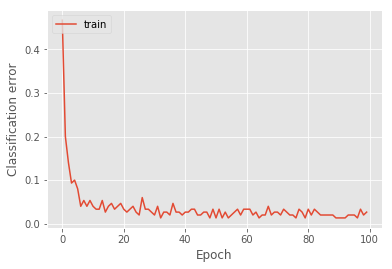

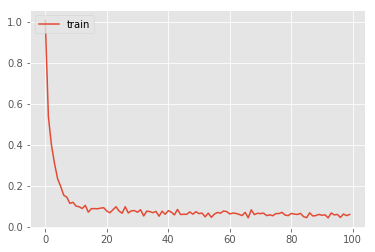

In [8]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.plot(error, label='Acc')
#plt.title('')
plt.ylabel('Classification error')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(loss, label='Acc')
#plt.title('')
#plt.ylabel('Classification error')
#plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()